In [1]:
import IPython.display as display

#display.YouTubeVideo("iinQDhsdE9s")

osm = """
<iframe width="425" 
        height="350" 
        frameborder="0" 
        scrolling="no" 
        marginheight="0" 
        marginwidth="0" 
        src="http://www.openstreetmap.org/export/embed.html?bbox=-2.9662737250328064%2C53.400500637844594%2C-2.964626848697662%2C53.402550738394034&amp;layer=mapnik" 
        style="border: 1px solid black">
</iframe>
<br/>
<small>
    <a href="http://www.openstreetmap.org/#map=19/53.40153/-2.96545">View Larger Map</a>
</small>
"""

display.HTML(osm)

GeoPandas exemplo de uso


C:\Users\2001h\AppData\Local\Temp\ipykernel_13432\743506911.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gt_polygons["centroid"] = gt_polygons.geometry.centroid


<Axes: >

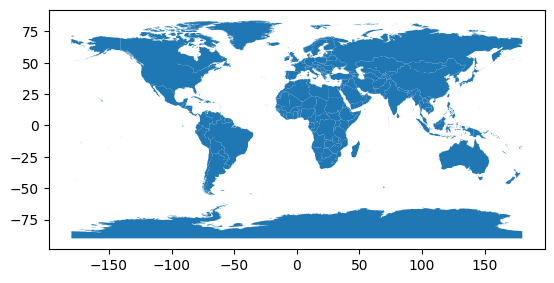

In [2]:
import pandas
import osmnx
import geopandas
import rioxarray
import xarray
import datashader
import contextily as cx
from shapely import geometry
import matplotlib.pyplot as plt

source_url = (
    "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip"

)

gt_polygons = geopandas.read_file(source_url)
gt_polygons["centroid"] = gt_polygons.geometry.centroid
gt_polygons.head()

# type(gt_polygons.geometry[0])

gt_polygons.plot()

Show centroids as points

<Axes: >

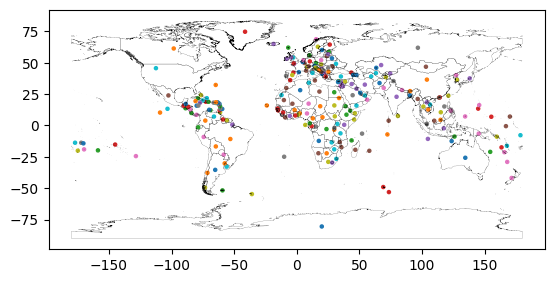

In [3]:
ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=5)

gt_polygons.plot(
    "ADMIN",
    ax=ax,
    facecolor='none',
    edgecolor='k',
    linewidth=0.1
)

Consultar centroids por país ("ADMIN")

<Axes: >

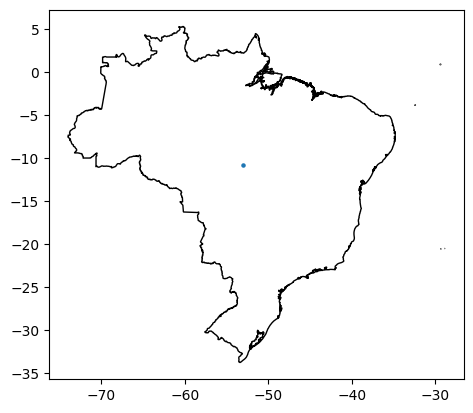

In [4]:
brasil_polygon =  gt_polygons.query('ADMIN == "Brazil"')
brasil_centroid = gt_polygons.set_geometry("centroid").query('ADMIN == "Brazil"').plot("ADMIN", markersize=5)

brasil_polygon.plot("ADMIN", ax=brasil_centroid, facecolor='None', edgecolor='k')

Pontos extremos do território Brasileiro

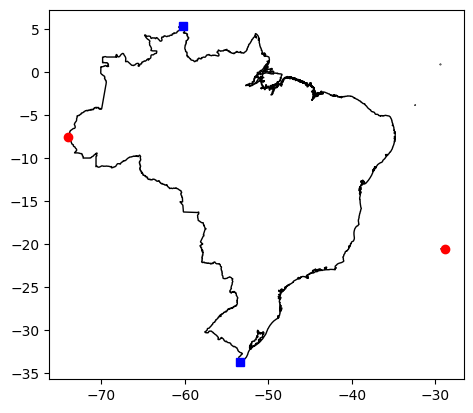

In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

polygons = brasil_polygon.geometry
all_polygons = [
    polygon.exterior.coords 
        for multi_polygon in polygons
        for polygon in multi_polygon.geoms
    ]

all_coords_flat = [
    coord for polygon in all_polygons
        for coord in polygon
    ]

ponto_oriental_x = max(all_coords_flat, key=lambda x: x[0])
ponto_ocidental_x = min(all_coords_flat, key=lambda x: x[0])
ponto_topo_y =  max(all_coords_flat, key=lambda y: y[1])
ponto_baixo_y =  min(all_coords_flat, key=lambda y: y[1])

ponto_ocidental = Point(ponto_ocidental_x)
ponto = Point(ponto_oriental_x)

ponto_topo = Point(ponto_topo_y)
ponto_baixo = Point(ponto_baixo_y)

fig, ax = plt.subplots()

brasil_polygon.plot("ADMIN", ax=ax, facecolor='None', edgecolor='k')

ax.plot(ponto.x, ponto.y, "ro", markersize=6)
ax.plot(ponto_ocidental.x, ponto_ocidental.y, "ro", markersize=6)

ax.plot(ponto_topo.x, ponto_topo.y, "bs", markersize=6)
ax.plot(ponto_baixo.x, ponto_baixo.y, "bs", markersize=6)


plt.show()